# TV Shows and Movies listed on Netflix

## Analysis & Visualization 

In [501]:
# Importing liabraries
!pip install Wordcloud
import pandas as pd
import numpy as np 
from matplotlib import pyplot as plt

import seaborn as sns
sns.set_style("dark")
%matplotlib inline
from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

In [392]:
# Importing data 
df = pd.read_csv('netflix_titles.csv')
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,81145628,Movie,Norm of the North: King Sized Adventure,"Richard Finn, Tim Maltby","Alan Marriott, Andrew Toth, Brian Dobson, Cole...","United States, India, South Korea, China","September 9, 2019",2019,TV-PG,90 min,"Children & Family Movies, Comedies",Before planning an awesome wedding for his gra...
1,80117401,Movie,Jandino: Whatever it Takes,NaN,Jandino Asporaat,United Kingdom,"September 9, 2016",2016,TV-MA,94 min,Stand-Up Comedy,Jandino Asporaat riffs on the challenges of ra...
2,70234439,TV Show,Transformers Prime,NaN,"Peter Cullen, Sumalee Montano, Frank Welker, J...",United States,"September 8, 2018",2013,TV-Y7-FV,1 Season,Kids' TV,"With the help of three human allies, the Autob..."
3,80058654,TV Show,Transformers: Robots in Disguise,NaN,"Will Friedle, Darren Criss, Constance Zimmer, ...",United States,"September 8, 2018",2016,TV-Y7,1 Season,Kids' TV,When a prison ship crash unleashes hundreds of...
4,80125979,Movie,#realityhigh,Fernando Lebrija,"Nesta Cooper, Kate Walsh, John Michael Higgins...",United States,"September 8, 2017",2017,TV-14,99 min,Comedies,When nerdy high schooler Dani finally attracts...


## schema 
- Type : Whether it is tv-show or moive
- title : The name of  the work 
- director : The name of the director (droped many nulls)
- cast : Actors involved in the movie / show (droped many nulls)
- Country : The county of the work 
- Date_added : Date it was added on Netflix
- Release year : Actual Release year of the move / show
- Rating : TV Rating of the movie / show
- Duration : Total Duration - in minutes or number of seasons 
- Listed in : Genere
- Describtion :The summary description


#### Handling the missing values

In [393]:
df.isnull().sum()

show_id            0
type               0
title              0
director        1969
cast             570
country          476
date_added        11
release_year       0
rating            10
duration           0
listed_in          0
description        0
dtype: int64

In [394]:
# droping directior column due to large missingf director, cast, country
df.drop(df[['director', 'cast', 'country']], axis = 1, inplace = True)

In [395]:
# Checking for The most comman value to fill the null
most_common = df['rating']
most_common.groupby(most_common).count()

rating
G             37
NC-17          2
NR           218
PG           184
PG-13        286
R            508
TV-14       1698
TV-G         149
TV-MA       2027
TV-PG        701
TV-Y         143
TV-Y7        169
TV-Y7-FV      95
UR             7
Name: rating, dtype: int64

In [396]:
# Filling rating missisg with column avarage
df["rating"].fillna("TV-14", inplace = True) 


In [397]:
# Dropping the raws with missing date_added values
df=df.dropna()

In [398]:
# Date format
df["date_added"] = pd.to_datetime(df['date_added'])
df['day_added'] = df['date_added'].dt.day
df['year_added'] = df['date_added'].dt.year
df['month_added']=df['date_added'].dt.month
df['year_added'].astype(int);
df['day_added'].astype(int);

In [399]:
df.isnull().sum()

show_id         0
type            0
title           0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
description     0
day_added       0
year_added      0
month_added     0
dtype: int64

In [400]:
df.head()

,show_id,type,title,date_added,release_year,rating,duration,listed_in,description,day_added,year_added,month_added
0,81145628,Movie,Norm of the North: King Sized Adventure,2019-09-09,2019,TV-PG,90 min,"Children & Family Movies, Comedies",Before planning an awesome wedding for his gra...,9,2019,9
1,80117401,Movie,Jandino: Whatever it Takes,2016-09-09,2016,TV-MA,94 min,Stand-Up Comedy,Jandino Asporaat riffs on the challenges of ra...,9,2016,9
2,70234439,TV Show,Transformers Prime,2018-09-08,2013,TV-Y7-FV,1 Season,Kids' TV,"With the help of three human allies, the Autob...",8,2018,9
3,80058654,TV Show,Transformers: Robots in Disguise,2018-09-08,2016,TV-Y7,1 Season,Kids' TV,When a prison ship crash unleashes hundreds of...,8,2018,9
4,80125979,Movie,#realityhigh,2017-09-08,2017,TV-14,99 min,Comedies,When nerdy high schooler Dani finally attracts...,8,2017,9


# Visualization 

### Movies V.S. TV shows 

Text(0, 0.5, 'Type')

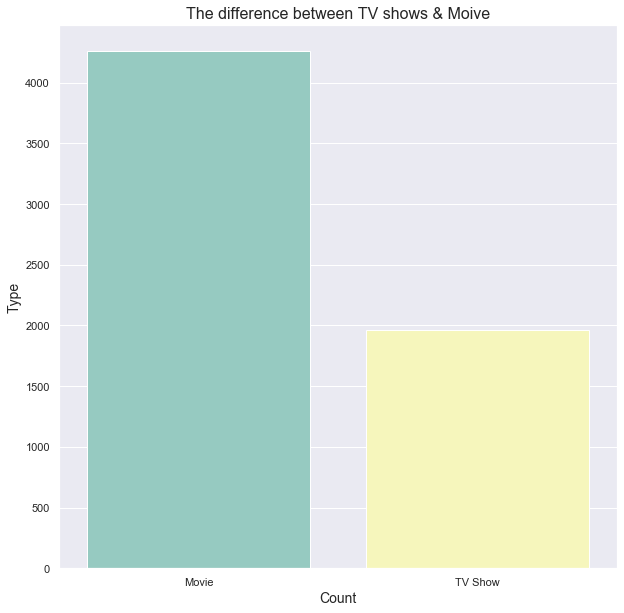

In [424]:

from matplotlib import rcParams
sns.countplot(df['type'], palette="Set3")
sns.set(style="darkgrid")
rcParams['figure.figsize'] = 11.7,8.27
plt.title('The difference between TV shows & Moive', fontsize = 16)
plt.xlabel('Count', fontsize = 14)
plt.ylabel('Type', fontsize = 14)

### The Highest year in adding new shows 

Text(0, 0.5, 'Number of new Addings')

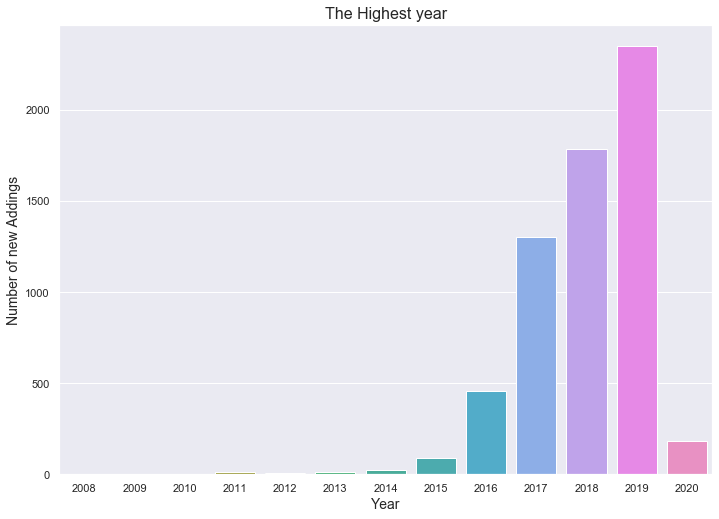

In [426]:

year = df[['year_added', 'show_id']].groupby('year_added').count().reset_index()
year 

sns.barplot(x="year_added", y="show_id", data=year)
sns.set(style="whitegrid")
rcParams['figure.figsize'] = 10,10
plt.title('The Highest year', fontsize = 16)
plt.xlabel('Year', fontsize = 14)
plt.ylabel('Number of new Addings', fontsize = 14)

In [497]:
import matplotlib.pyplot as plt
plt.style.use('seaborn-ticks')

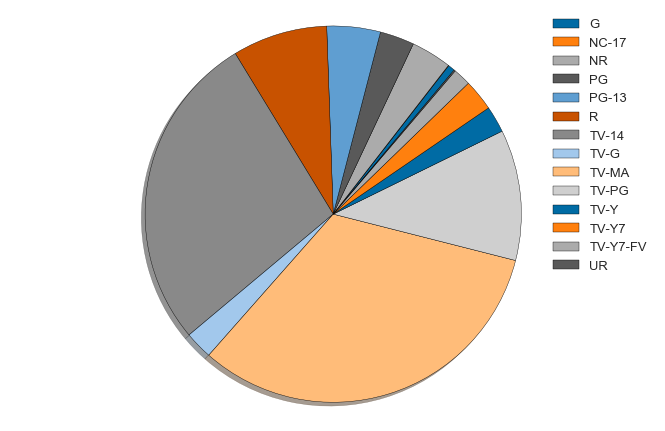

In [498]:
rating = df[['rating', 'show_id']].groupby('rating').count().reset_index()
rating
labels = 'G', 'NC-17', 'NR', 'PG', 'PG-13', 'R','TV-14','TV-G','TV-MA','TV-PG','TV-Y','TV-Y7', 'TV-Y7-FV', 'UR'
sizes = rating.show_id
fig1, ax1 = plt.subplots()
patches, texts = ax1.pie(sizes, shadow=True, startangle=50, )
plt.legend(patches, labels, loc="best")
ax1.axis('equal')  

plt.show()

## Creating a Wordcloud 

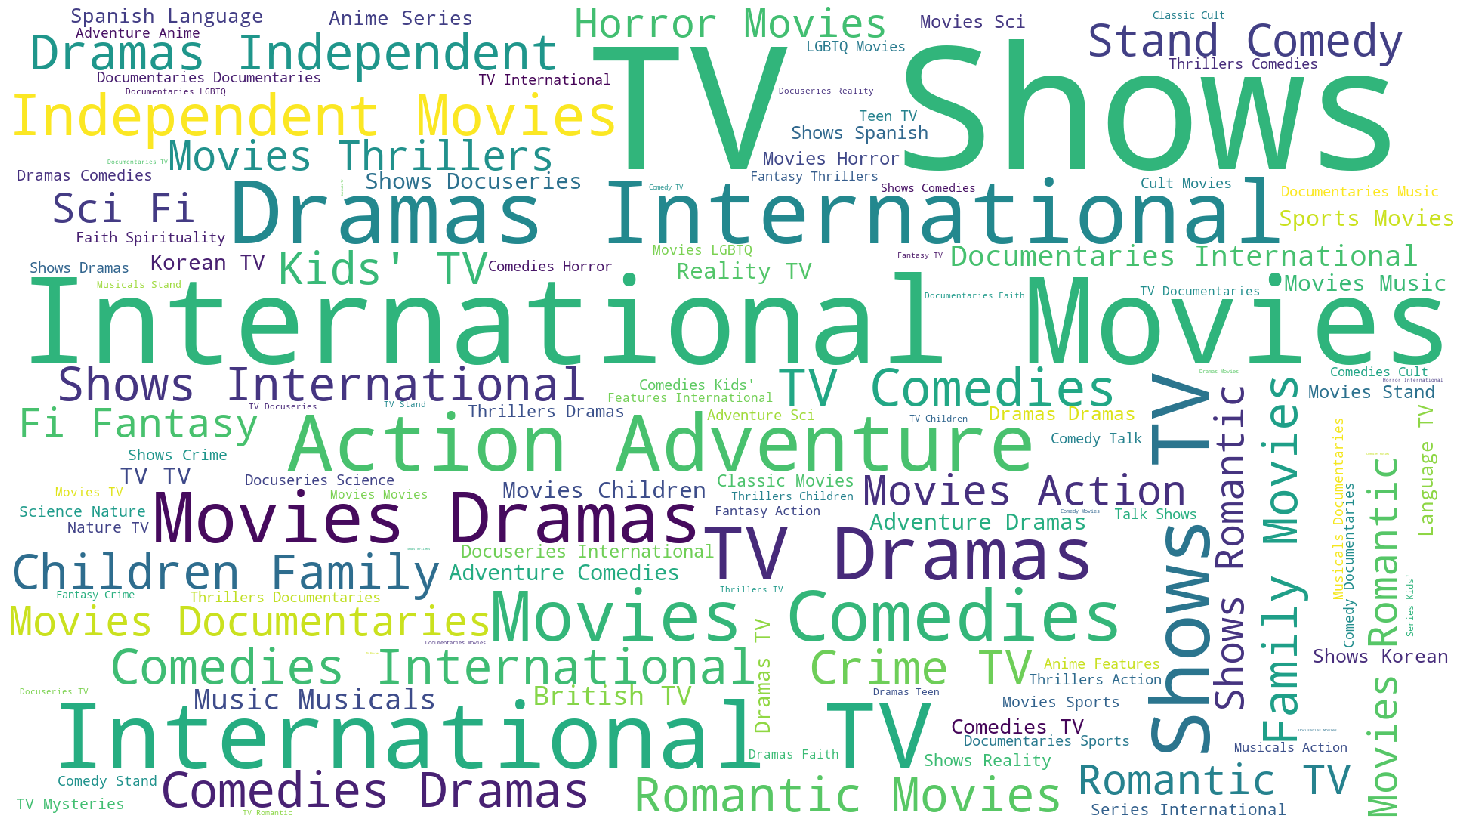

In [516]:
plt.subplots(figsize=(25,15))
wordcloud = WordCloud(
                          background_color='white',
                          width=1920,
                          height=1080
                         ).generate(" ".join(df.listed_in))
plt.imshow(wordcloud)
plt.axis('off')
plt.savefig('category.png')
plt.show()